In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Завантаження даних
file_path = "Steel_industry_data.csv"
data = pd.read_csv(file_path)

# Перетворення стовпця дати у формат datetime
data['date'] = pd.to_datetime(data['date'] ,dayfirst=True)

# Встановлення дати як індексу
data.set_index('date', inplace=True)

# Візуальна перевірка
print(data.head())


                     Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
date                                                                   
2018-01-01 00:15:00       3.17                                  2.95   
2018-01-01 00:30:00       4.00                                  4.46   
2018-01-01 00:45:00       3.24                                  3.28   
2018-01-01 01:00:00       3.31                                  3.56   
2018-01-01 01:15:00       3.82                                  4.50   

                     Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
date                                                                   
2018-01-01 00:15:00                                   0.0        0.0   
2018-01-01 00:30:00                                   0.0        0.0   
2018-01-01 00:45:00                                   0.0        0.0   
2018-01-01 01:00:00                                   0.0        0.0   
2018-01-01 01:15:00                                   0.0      

C:\Users\voins\AppData\Local\Temp\ipykernel_6816\1856941373.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_hourly = data_numeric.resample('H').mean()


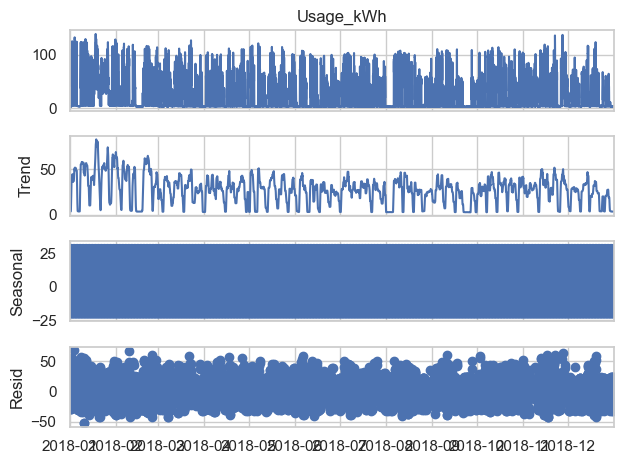

In [28]:
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_hourly = data_numeric.resample('H').mean()


# Декомпозиція часового ряду
decomposition = seasonal_decompose(data_hourly['Usage_kWh'], model='additive', period=24)
decomposition.plot()
plt.show()


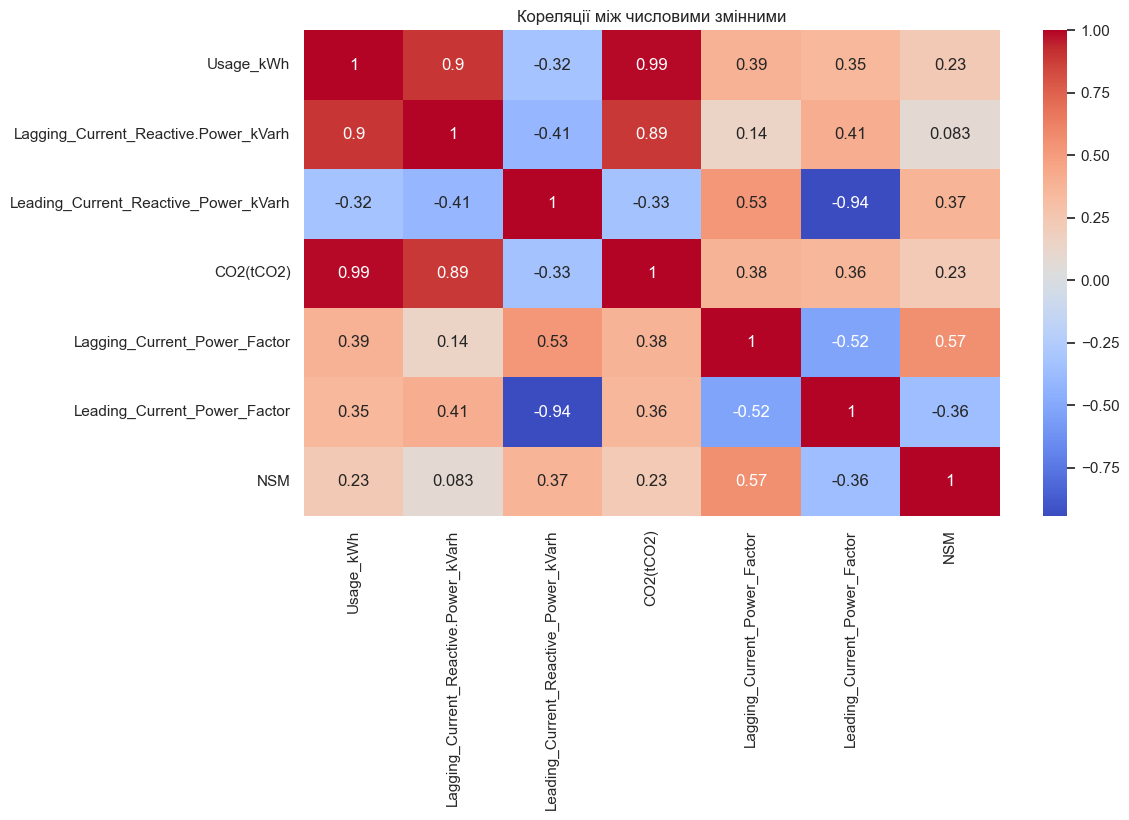

In [30]:
# Вибір тільки числових стовпців
data_numeric = data.select_dtypes(include=['float64', 'int64'])

# Візуалізація кореляцій
plt.figure(figsize=(10, 6))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Кореляції між числовими змінними")
plt.show()


In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [33]:
# Вибір часового ряду
series = data_hourly['Usage_kWh'].dropna().values

# Масштабування даних до діапазону [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_series = scaler.fit_transform(series.reshape(-1, 1))

# Розділення на тренувальні та тестові дані
train_size = int(len(scaled_series) * 0.8)
train, test = scaled_series[:train_size], scaled_series[train_size:]

# Створення послідовностей для LSTM
def create_sequences(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 24  # Наприклад, прогноз на основі останніх 24 годин
X_train, y_train = create_sequences(train, time_steps)
X_test, y_test = create_sequences(test, time_steps)


In [34]:
# Створення моделі
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_steps, 1)),
    LSTM(50, return_sequences=False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Навчання моделі
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/20


c:\Users\voins\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0379 - val_loss: 0.0214
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0224 - val_loss: 0.0183
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0176 - val_loss: 0.0142
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0156 - val_loss: 0.0141
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0155 - val_loss: 0.0134
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0147 - val_loss: 0.0130
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0140 - val_loss: 0.0115
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0126 - val_loss: 0.0106
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0125 - val_loss: 0.0098
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0108 - val_loss: 0.0093
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0107 - val_loss: 0.0112
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Squared Error: 111.33863379085867


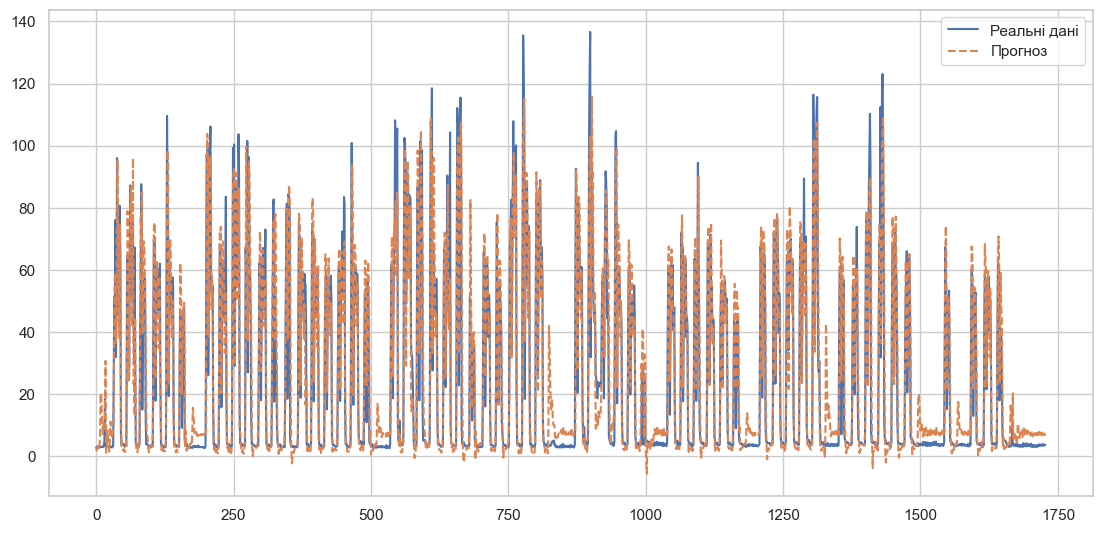

In [35]:
# Прогнозування
y_pred = model.predict(X_test)

# Зворотне масштабування
y_test_inverse = scaler.inverse_transform(y_test)
y_pred_inverse = scaler.inverse_transform(y_pred)

# Оцінка точності
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
print(f"Mean Squared Error: {mse}")

# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_inverse)), y_test_inverse, label="Реальні дані")
plt.plot(range(len(y_pred_inverse)), y_pred_inverse, label="Прогноз", linestyle='--')
plt.legend()
plt.show()


C:\Users\voins\AppData\Local\Temp\ipykernel_6816\2006782464.py:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(data_hourly.index[-1], periods=n_hours + 1, freq='H')[1:]


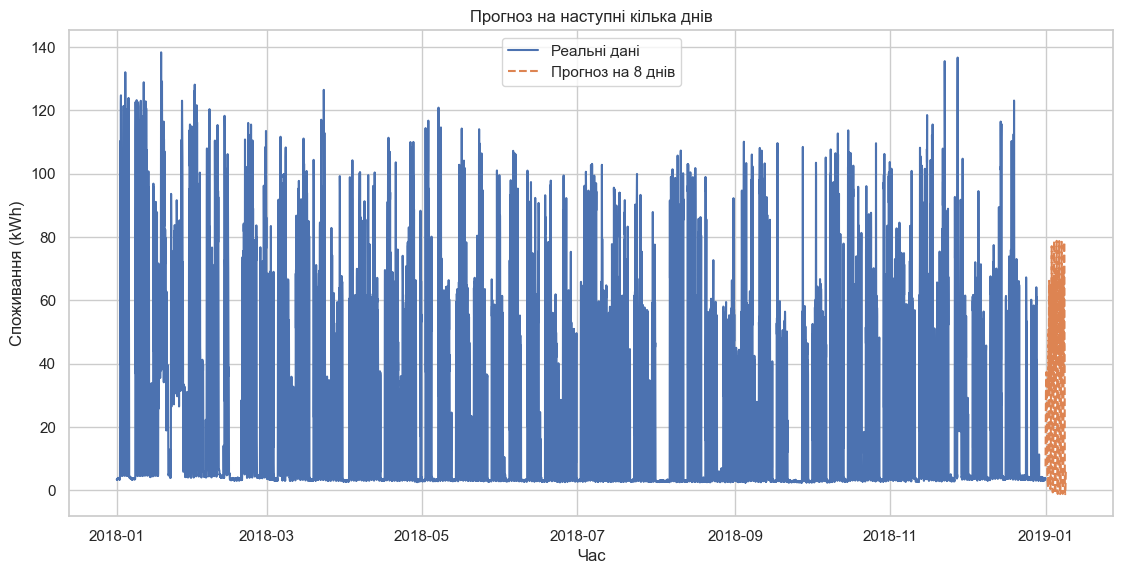

In [40]:
# Визначаємо кількість годин для прогнозу (наприклад, на 7 днів вперед)
n_days = 8  # Вказана кількість днів
n_hours = n_days * 24  # Кількість годин

# Створення послідовності для прогнозу
input_sequence = scaled_series[-time_steps:].reshape(1, time_steps, 1)  # Останні дані для прогнозу в потрібній формі
predictions = []

for _ in range(n_hours):
    # Прогнозуємо наступне значення
    predicted_value = model.predict(input_sequence, verbose=0)
    
    # Додаємо прогноз в список
    predictions.append(predicted_value[0, 0])
    
    # Оновлюємо послідовність для наступного прогнозу (видаляємо перше значення та додаємо нове)
    input_sequence = np.append(input_sequence[:, 1:, :], predicted_value.reshape(1, 1, 1), axis=1)

# Зворотне масштабування для прогнозованих значень
predicted_values_inverse = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Створення індексів для прогнозованих значень
forecast_index = pd.date_range(data_hourly.index[-1], periods=n_hours + 1, freq='H')[1:]

# Візуалізація прогнозу
plt.figure(figsize=(12, 6))
plt.plot(data_hourly.index, data_hourly['Usage_kWh'], label="Реальні дані")
plt.plot(forecast_index, predicted_values_inverse, label=f"Прогноз на {n_days} днів", linestyle='--')
plt.legend()
plt.title("Прогноз на наступні кілька днів")
plt.xlabel("Час")
plt.ylabel("Споживання (kWh)")
plt.show()
